In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/tmp/ipykernel_4043837/1134038599.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


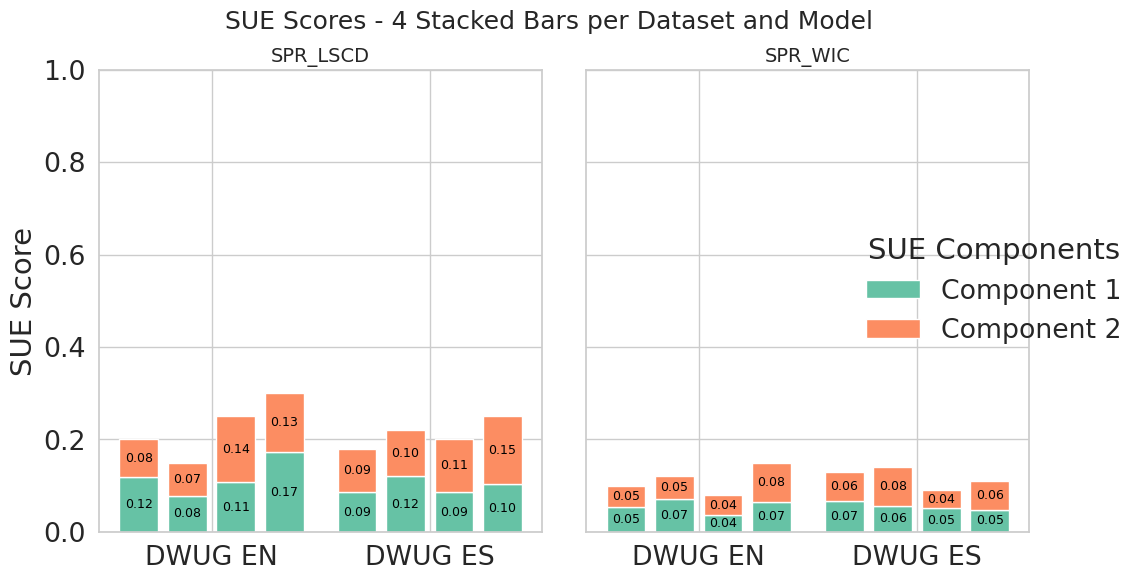

In [3]:
# Style
sns.set_theme(style="whitegrid")
sns.set_context(context="notebook", font_scale=1.75)

# Base data: one SUE per model and language
data = {
    "Program_Task": ["SPR_LSCD"] * 8 + ["SPR_WIC"] * 8,
    "Program_Language": ["DWUG ES", "DWUG EN"] * 8,
    "Model": [
        "llama3.1",
        "llama3.1",
        "llama3.3",
        "llama3.3",
        "mixtral8x7b",
        "mixtral8x7b",
        "deepseek",
        "deepseek",
    ]
    * 2,
    "SUE": [
        0.18,
        0.2,
        0.22,
        0.15,
        0.20,
        0.25,
        0.25,
        0.3,  # SPR_LSCD
        0.13,
        0.1,
        0.14,
        0.12,
        0.09,
        0.08,
        0.11,
        0.15,  # SPR_WIC
    ],
}

df = pd.DataFrame(data)

# Simulate splitting each SUE into two stacked components (just for visual stack)
np.random.seed(42)
df["Component1"] = df["SUE"] * np.random.uniform(0.4, 0.6, size=len(df))
df["Component2"] = df["SUE"] - df["Component1"]

# Model and language order
model_order = ["llama3.1", "llama3.3", "mixtral8x7b", "deepseek"]
lang_order = ["DWUG EN", "DWUG ES"]
colors = sns.color_palette("Set2", n_colors=2)

# Setup subplots
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), sharey=True, gridspec_kw={"wspace": 0.1}
)

for i, task in enumerate(["SPR_LSCD", "SPR_WIC"]):
    ax = axes[i]
    task_data = df[df["Program_Task"] == task]

    for j, lang in enumerate(lang_order):
        lang_data = task_data[task_data["Program_Language"] == lang]
        x_positions = np.arange(len(model_order)) + (
            j * (len(model_order) + 0.5)
        )  # space between EN and ES groups

        heights1 = lang_data["Component1"].values
        heights2 = lang_data["Component2"].values

        ax.bar(
            x_positions,
            heights1,
            label="Component 1" if i == 0 and j == 0 else "",
            color=colors[0],
        )
        ax.bar(
            x_positions,
            heights2,
            bottom=heights1,
            label="Component 2" if i == 0 and j == 0 else "",
            color=colors[1],
        )

        # Display values for each component
        for k, (x, h1, h2) in enumerate(zip(x_positions, heights1, heights2)):
            ax.text(
                x,
                h1 / 2,
                f"{h1:.2f}",
                ha="center",
                va="center",
                fontsize=9,
                color="black",
            )  # Value for Component1
            ax.text(
                x,
                h1 + h2 / 2,
                f"{h2:.2f}",
                ha="center",
                va="center",
                fontsize=9,
                color="black",
            )  # Value for Component2

        # Set ticks at center of grouped bars
        ax.set_xticks([1.5, 6])
        ax.set_xticklabels(lang_order)

    ax.set_title(task, fontsize=14)
    if i == 0:
        ax.set_ylabel("SUE Score")
    ax.set_ylim(0, 1.0)

# One shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="SUE Components", loc="center right", frameon=False)

fig.suptitle("SUE Scores - 4 Stacked Bars per Dataset and Model", fontsize=18)
plt.tight_layout(rect=[0, 0, 0.92, 1])
plt.show()